# <div align="center">Linear Regression</div>
## <div align="center">Classical and probabilistic approach to Linear Regression</div>
In this jupyter notebook I will cover both approaches to Linear Regression. Specifically
in the probabilistic approach we will derive the optimal Linear Predictor using
MLE, MAP, and Bayes Estimator. For this notebook I will be using the King County
House Sales dataset available on Kaggle. The code will not use any machine learning
libraries like scikit-learn so that we truly understand the steps.

### Overview
Linear regression is the process by which we find the optimal vector of weights $\vec{w}$
that best fits the linear predictor
$f(\vec{x})=w_0x_0+w_1x_1+...+w_dx_d=\sum_{j=0}^d{w_jx_j}=\vec{w}^Tx$

In other words we need to find the vector $\vec{w}$ that when given any vector $\vec{x}$
will give us the optimal prediction $f(\vec{x})$. This definition of linear regression will
make more sense when I cover the probabilistic approach of linear regression.

Linear regression is more easily understood as fitting a line to data. In order to fit
a line to data we have to define a cost function that allows us to measure the error between
what the actual values of the data are and what our line says they should be (predicted values).

#### Cost
For this tutorial I will use the squared error cost function but there are a great many cost
functions each with their own advantages and disadvantages. The squared error cost function
is:

$cost = (\hat{y} - y)^2$

where $\hat{y}$ is the
predicted value (value on the line of best fit) and $y$ is the actual value.

This is a simple cost function that penalizes larger errors more than small errors
since the difference between actual and predicted values is squared.

## Classical Approach

Our goal with linear regression classical approach is to minimize the cost function. Meaning we want
to make the cost as small as possible. We do this by picking the values of the
slope, $m$, and the y-intercept $b$, that minimize the cost.

Take a look at the following example given the dataset
$D = \{(1, 2), (3, 5), (5, 4), (7, 7)\}$ and a line $y=x$, with the slope $m=1$ and
the y-intercept $b=0$:

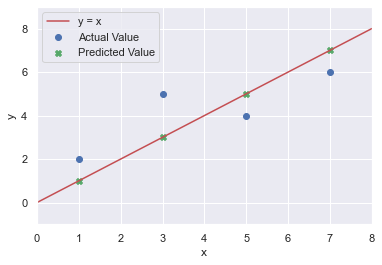

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

x = [1, 3, 5, 7]
y = [2, 5, 4, 6]
plt.scatter(x, y, label='Actual Value')
plt.scatter([1, 3, 5, 7], [1, 3, 5, 7], marker='X', label='Predicted Value', c='g')
plt.plot([0, 8], [0, 8], c='r', label='y = x')

plt.xlim(xmin=0, xmax=8)
plt.ylim(ymin=-1, ymax=9)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

plt.show()

The red line above represents a possible combination of slope $m$ and y-intercept
$b$. In the example above the cost is:

$cost = (1-2)^2+(3-5)^2+(5-4)^2+(7-6)^2=7$

Therefore the red line with slope $m=1$ and y-intercept $b=0$ has a total
cost of 7.

So the total cost for a given $m$ and $b$  of a line is:

$cost=\sum{((mx+b)-y)^2}$

In words, the total cost is the sum of the difference between the predicted and
actual values, squared for all values of $x$ and $y$ in the dataset.

One way of finding the linear regression of the dataset would be to repeat the process
over and over again until we find the values of $m$ and $b$ that give the smallest
possible cost but that would take infinite time since we can always make a smaller increment
in $m$ or $b$. Therefore we estimate the minimum cost using Gradient Descent.

### Gradient Descent
...

## Probabilistic Approach
The probabilistic approach is more complicated because it clearly defines the assumptions
that we take for granted in the classical approach. I will discuss these at the end.

### Deriving Optimal Regressor for Squared Error
The first step in the probabilistic approach is to derive an expression for the optimal
regressor given the squared error cost function. To do this we have to minimize the expected
cost $E[C]$.

We begin with the equation for expected cost:

$E[C] = \int_x\int_{y\epsilon Y}{cost(\hat{y} - y)p(\vec{x},y)}dyd\vec{x}$

In this expression we can plug in our squared error cost function.

$E[C] = \int_x\int_{y\epsilon Y}{(\hat{y} - y)^2p(\vec{x},y)}dyd\vec{x}$

Then we can split $p(\vec{x},y)$ into $p(y|\vec{x})p(\vec{x})$ to get

$E[C] = \int_xp(\vec{x})\int_{y\epsilon Y}{(\hat{y} - y)^2p(y|\vec{x})}dyd\vec{x}$

Since $\int_{y\epsilon Y}{(\hat{y} - y)^2p(y|\vec{x})}dy$ is equivalent to $E[C|X=\vec{x}]$
we can substitute

$E[C]=\int_xp(\vec{x})E[C|X=\vec{x}]d\vec{x}$

Since  $p(\vec{x})$ is the same for every $C$ the optimal regressor that
minimizes $E[C]$ simply minimizes $E[C|X=\vec{x}]$

Therefore to minimize $E[C|X=\vec{x}]$ we take the derivative and set it equal to 0.
Recall that $E[C|X=\vec{x}]=\int_{y\epsilon Y}{(\hat{y} - y)^2p(y|\vec{x})}dy=g(\hat{y})$

$arg \min_{\hat{y} \epsilon Y}g(\hat{y})$ is the same thing as $g'(\hat{y})=0$

$g'(\hat{y}) = 2\int_y(\hat{y}-y)p(y|\vec{x})dy=0$

$g'(\hat{y})=\int_y\hat{y}p(y|\vec{x})dy - \int_y(yp(y|\vec{x})dy=0$

$\int_y\hat{y}p(y|\vec{x})dy = \int_y(yp(y|\vec{x})dy$

Since $\hat{y}$ is constant relative to $y$ we can pull it out of the integral on the left.

$\hat{y}\int_yp(y|\vec{x})dy = \int_y(yp(y|\vec{x})dy$

Since the probability of all $y$ given a fixed $\vec{x}$ must equal 1 we have:

$\hat{y}= \int_y(yp(y|\vec{x})dy$

which matches exactly the definition for the conditional expected value.

$\hat{y}= \int_y(yp(y|\vec{x})dy=E[Y|X=\vec{x}]$

Thus we have minimized the expected cost.